In [2]:
import pandas as pd

#For test data
df_train = pd.read_csv("train_samples.csv")
df_train.head()

,I/Q signal,Modulation_type,SNR,Amplitude,Primary_User_Presence
0,-5.3783-10.269i,13,-20,11.592173,Yes
1,0.12619-0.071555i,23,0,0.145066,Yes
2,0.07027-1.4843i,50,-10,1.485962,Yes
3,-0.23282-0.35469i,40,12,0.424276,Yes
4,0.25707+1.8581i,32,0,1.875799,Yes


In [3]:
#For test data
df_test = pd.read_csv("test_samples.csv")
df_test.head()

,I/Q signal,Modulation_type,SNR,Amplitude,Primary_user_presence
0,0.40577-0.5238i,41,-8,0.662583,Yes
1,0.50328-0.44545i,41,-4,0.672099,Yes
2,-0.095059-0.26969i,50,16,0.285953,Yes
3,1.7911+0.3581i,22,-10,1.826547,Yes
4,-0.09956-0.0015858i,1,6,0.099573,Yes


In [4]:
#Labelling train data

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()   #LabelEncoder function is used to convert script data to numerical value
df_train['Primary_User_Presence_n'] = encoder.fit_transform(df_train['Primary_User_Presence'])
df_train.head()

,I/Q signal,Modulation_type,SNR,Amplitude,Primary_User_Presence,Primary_User_Presence_n
0,-5.3783-10.269i,13,-20,11.592173,Yes,1
1,0.12619-0.071555i,23,0,0.145066,Yes,1
2,0.07027-1.4843i,50,-10,1.485962,Yes,1
3,-0.23282-0.35469i,40,12,0.424276,Yes,1
4,0.25707+1.8581i,32,0,1.875799,Yes,1


In [5]:
inputs = df_train.drop(['I/Q signal','Primary_User_Presence','Primary_User_Presence_n'],axis='columns') 
inputs.head()

,Modulation_type,SNR,Amplitude
0,13,-20,11.592173
1,23,0,0.145066
2,50,-10,1.485962
3,40,12,0.424276
4,32,0,1.875799


In [6]:
target = df_train['Primary_User_Presence_n']  #Target dataset containing presence of user
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Primary_User_Presence_n, dtype: int32

In [7]:
#Labelling test data

df_test['Primary_user_presence_n'] = encoder.fit_transform(df_test['Primary_user_presence'])
df_test.head()

,I/Q signal,Modulation_type,SNR,Amplitude,Primary_user_presence,Primary_user_presence_n
0,0.40577-0.5238i,41,-8,0.662583,Yes,1
1,0.50328-0.44545i,41,-4,0.672099,Yes,1
2,-0.095059-0.26969i,50,16,0.285953,Yes,1
3,1.7911+0.3581i,22,-10,1.826547,Yes,1
4,-0.09956-0.0015858i,1,6,0.099573,Yes,1


In [8]:
inputs_test = df_test.drop(['I/Q signal','Primary_user_presence','Primary_user_presence_n'],axis='columns') 
inputs_test.head()

,Modulation_type,SNR,Amplitude
0,41,-8,0.662583
1,41,-4,0.672099
2,50,16,0.285953
3,22,-10,1.826547
4,1,6,0.099573


In [9]:
target_test = df_test['Primary_user_presence_n']   #Target dataset containing presence of user
target_test.head()

0    1
1    1
2    1
3    1
4    1
Name: Primary_user_presence_n, dtype: int32

In [10]:
#Implementing Decision Tree

from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs,target)

DecisionTreeClassifier()

In [11]:
#Train accuracy of decision tree
res_train_DT = model.score(inputs,target) * 100 
print("Training accuracy of Decision Tree is " + str(res_train_DT) + " %")

Training accuracy of Decision Tree is 100.0 %


In [12]:
#Test accuracy of decision tree
res_test_DT = model.score(inputs_test,target_test)*100
print("Testing accuracy of Decision Tree is " + str(res_test_DT) + " %")

Testing accuracy of Decision Tree is 100.0 %


In [32]:
target_pred_DT = model.predict(inputs_test)

import numpy as np
misclassified_DT = np.where(target_test!=target_pred_DT)
print("Number of samples wrongly classisied are " + str(len(misclassified_DT[0])))

Number of samples wrongly classisied are 0


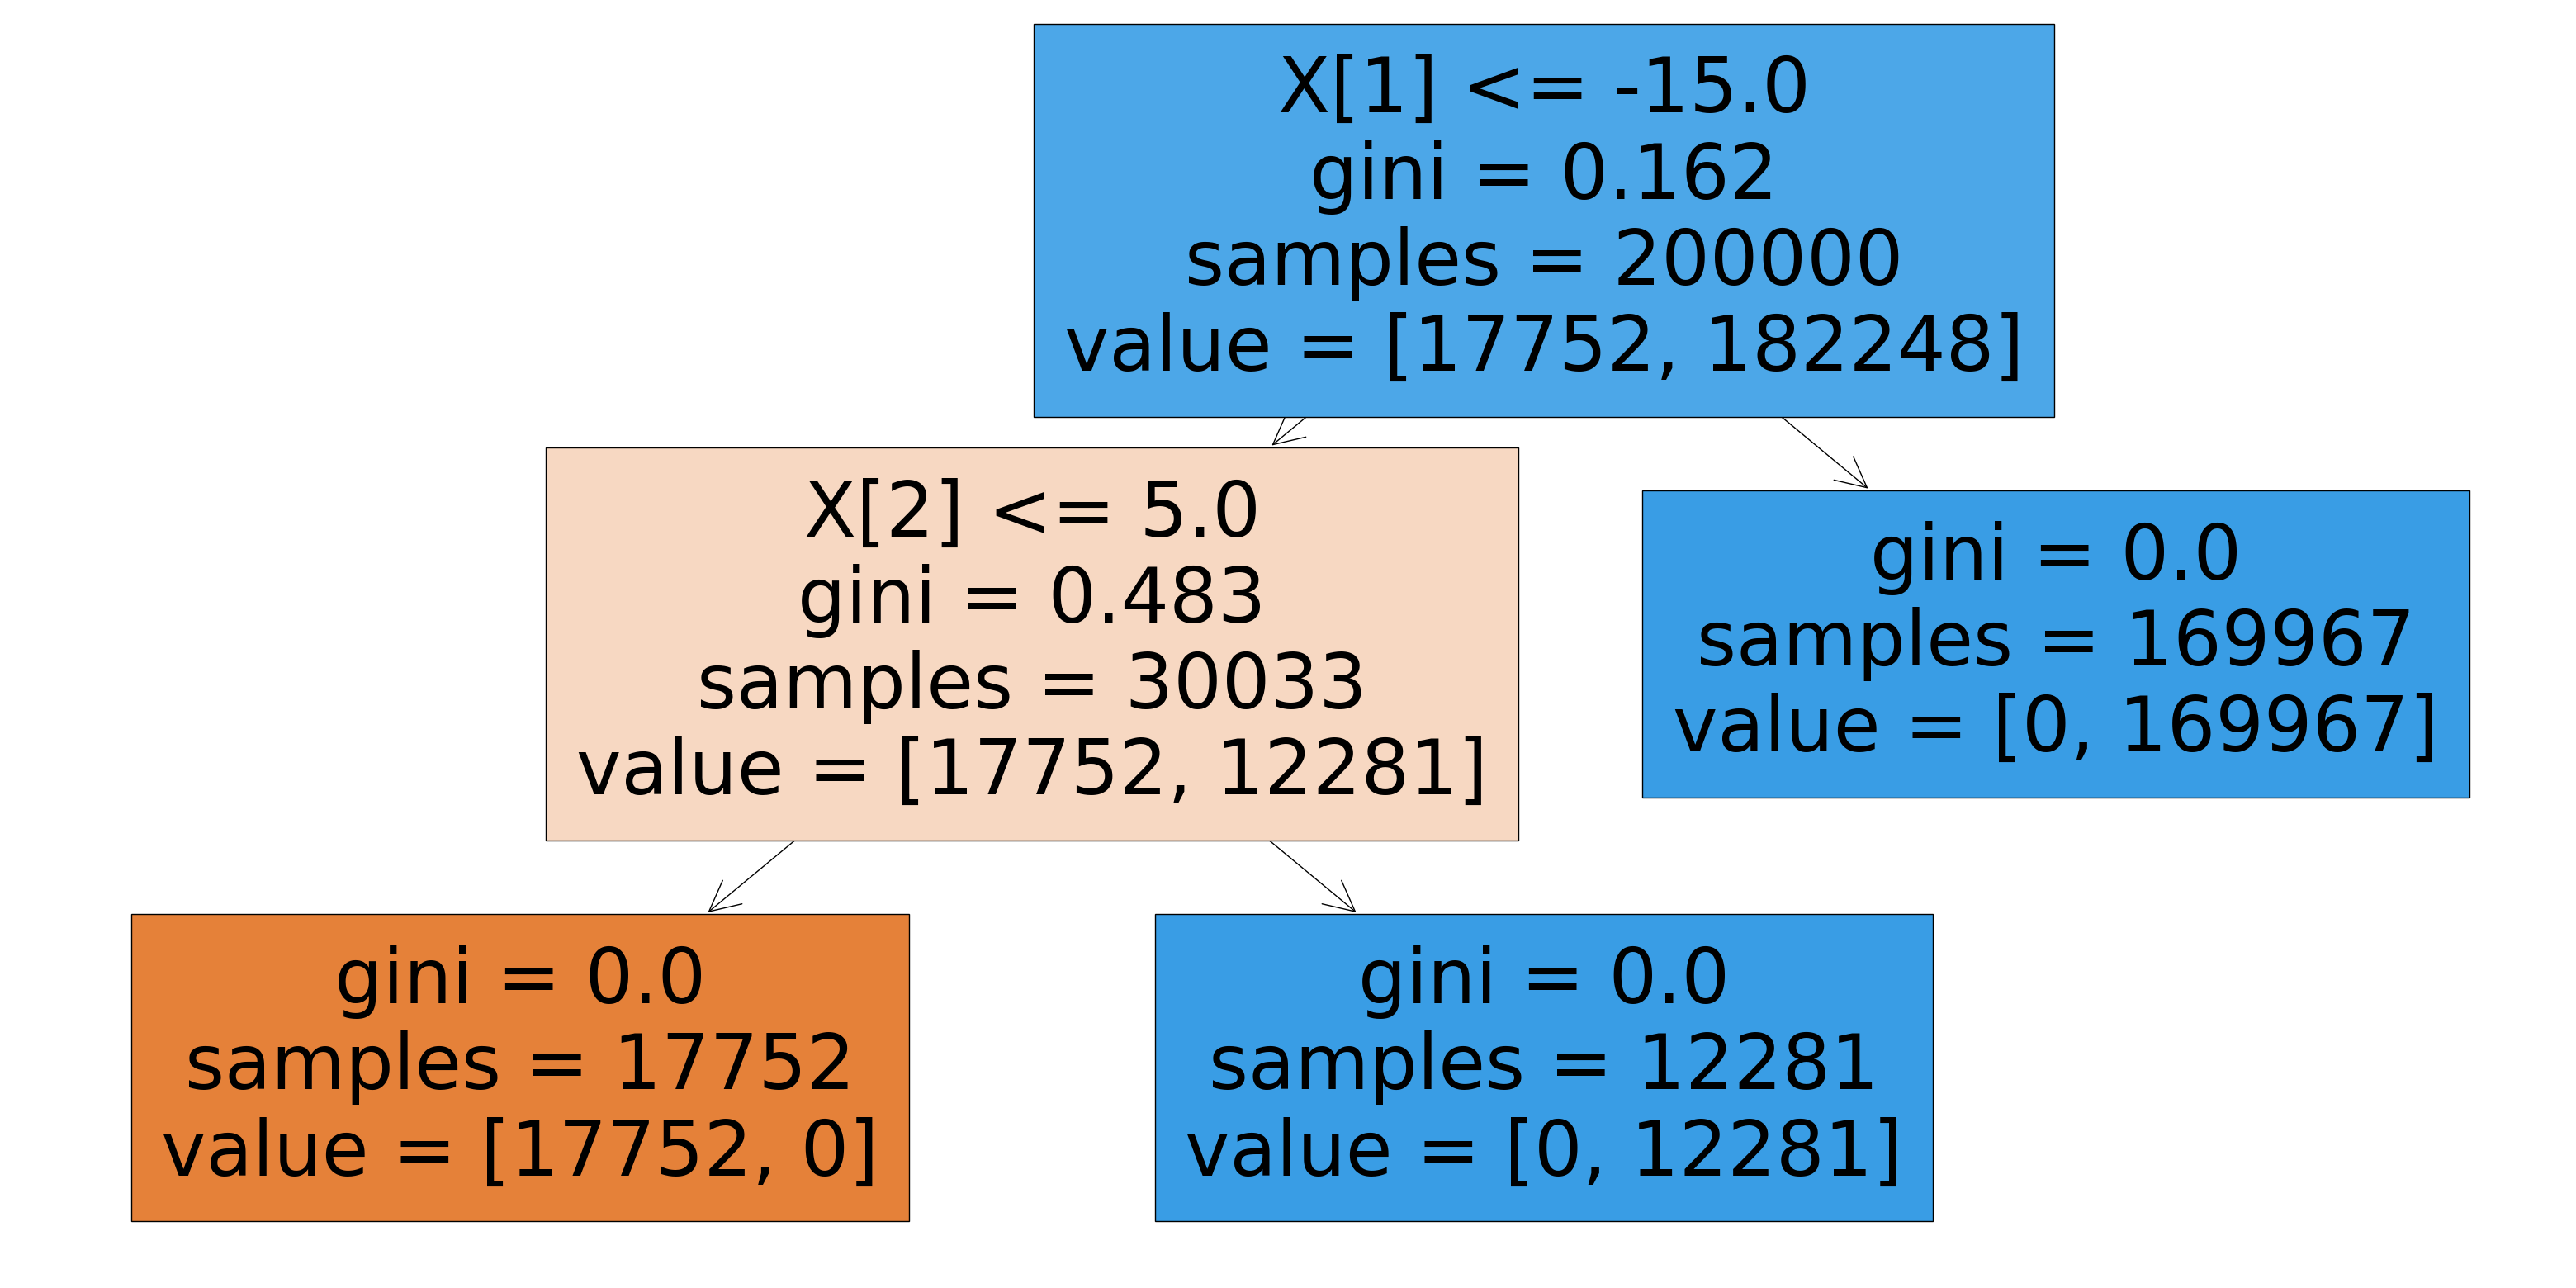

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(40,20))
a =tree.plot_tree(model,filled=True)

In [15]:
#Implementing SVM

from sklearn.svm import SVC
svmclassifier = SVC(kernel='linear')   #For linearly seperable data
svmclassifier.fit(inputs, target)

SVC(kernel='linear')

In [16]:
#Train accuracy of SVM
res_train_SVM = svmclassifier.score(inputs,target) * 100
print("Training accuracy of SVM is " + str(res_train_SVM) + " %")

Testing accuracy of SVM is 97.41499999999999 %


In [17]:
#Test accuracy of SVM
res_test_SVM = svmclassifier.score(inputs_test,target_test) * 100
print("Testing accuracy of SVM is " + str(res_test_SVM) + " %")

Testing accuracy of SVM is 97.494 %


In [18]:
target_pred_SVM = svmclassifier.predict(inputs_test)

In [33]:
#Misclassified Samples
misclassified_SVM = np.where(target_test!=target_pred_SVM)
print("Number of samples wrongly classisied are " + str(len(misclassified_SVM[0])))

Number of samples wrongly classisied are 2506


In [20]:
#Implementing KNN

#Scaling the features so that it is uniformly evaluated. The gradient decent algorithm which is used in neural network training
# and other machine learning algorithms helps in normalizing features. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs = scaler.transform(inputs)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=223)
classifier.fit(inputs,target)

KNeighborsClassifier(n_neighbors=223)

In [11]:
classifier.score(inputs,target)*100

C:\Users\gauta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


99.777

In [17]:
lst_n=[]
lst_acc=[]

import warnings
warnings.filterwarnings('ignore')


for i in range (8,451):
    lst_n.append(i)
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(inputs,target)
    lst_acc.append(classifier.score(inputs,target)*100)
    print(str(i)+', ', end=' ')
    
    
#print(lst_n)
#print(lst_acc)



8,  9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,  144,  145,  146,  147,  148,  149,  150,  151,  152,  153,  154,  155,  156,  157,  158,  159,  160,  161,  162,  163,  164,  165,  166,  167,  168,  169,  170,  171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,  182,  183,  184,  185,  186,  187,  188,  189,  19

In [56]:
lst_acc.index(max(lst_acc))

0

In [58]:
lst_acc[:10]

[99.9645,
 99.9645,
 99.9585,
 99.9585,
 99.957,
 99.954,
 99.957,
 99.957,
 99.9495,
 99.943]

NameError: name 'lst_n' is not defined

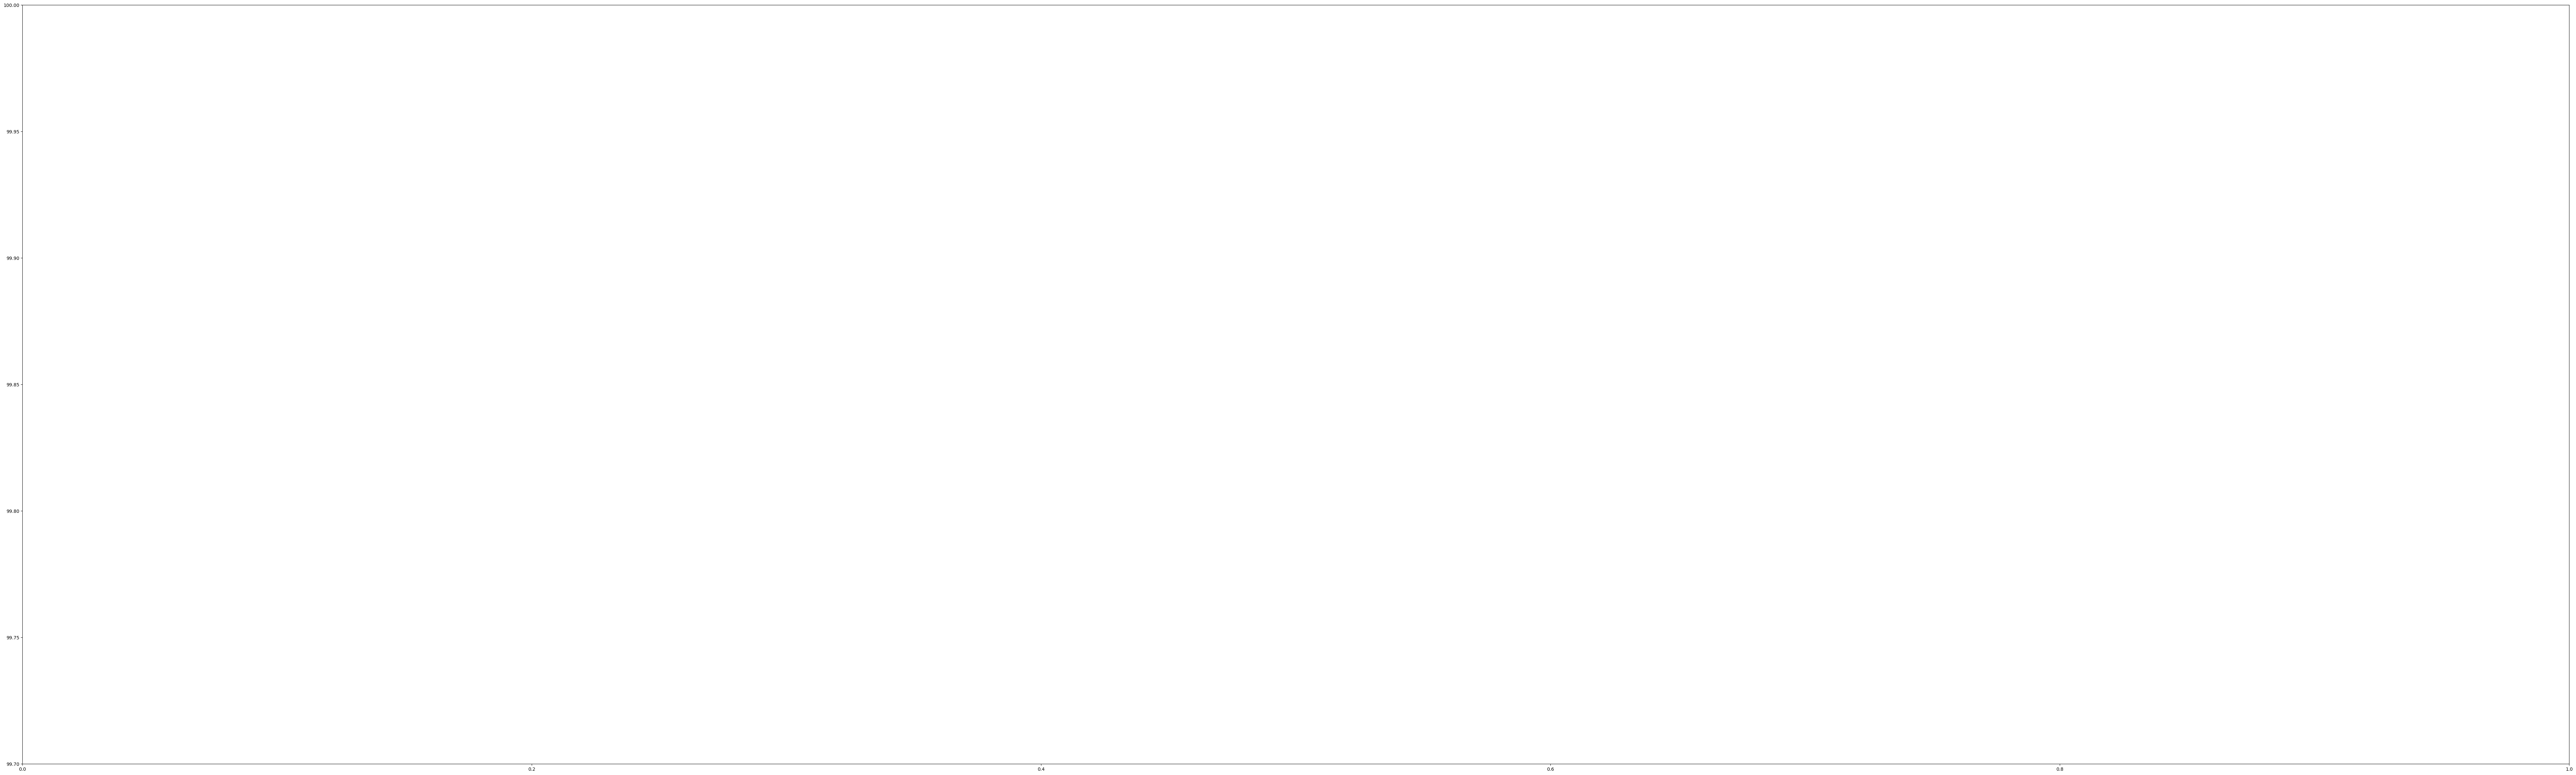

In [1]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,30))
plt.ylim(99.7,100)

plt.plot(lst_n,lst_acc)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.show()

In [12]:
res_train_KNN = classifier.score(inputs,target) * 100
print("Training accuracy of KNN is " + str(res_train_KNN) + " %")

C:\Users\gauta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Training accuracy of KNN is 99.777 %


In [13]:
res_test_KNN = classifier.score(inputs_test,target_test) * 100
print("Testing accuracy of KNN is " + str(res_test_KNN) + " %")

C:\Users\gauta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Testing accuracy of KNN is 99.763 %


In [ ]:
target_pred_KNN = classifier.predict(inputs_test)

In [34]:
misclassified_KNN = np.where(target_test!=target_pred_KNN)
print("Number of samples wrongly classisied are " + str(len(misclassified_KNN[0])))

Number of samples wrongly classisied are 22165


Confusion Matrix of Decision Tree


<AxesSubplot:>

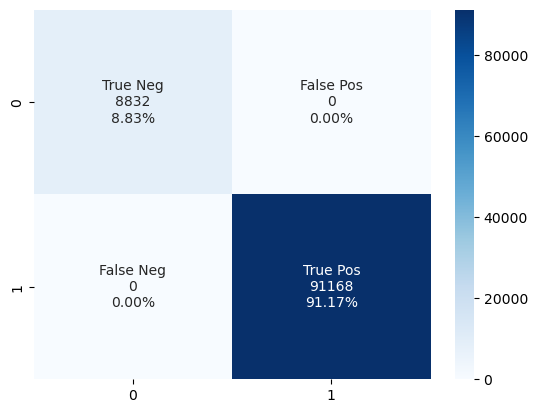

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_DT = confusion_matrix(target_test, target_pred_DT)

print("Confusion Matrix of Decision Tree")

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_DT.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_DT.flatten()/np.sum(cf_DT)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_DT, annot=labels, fmt='', cmap='Blues')

Confusion Matrix of SVM


<AxesSubplot:>

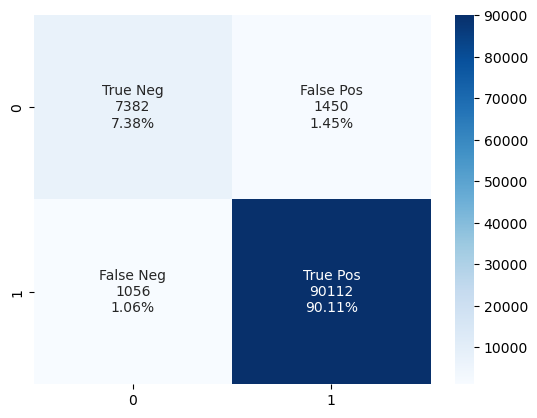

In [48]:
cf_SVM = confusion_matrix(target_test, target_pred_SVM)

print("Confusion Matrix of SVM")
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_SVM.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_SVM.flatten()/np.sum(cf_SVM)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_SVM, annot=labels, fmt='', cmap='Blues')

Confusion Matrix of KNN


<AxesSubplot:>

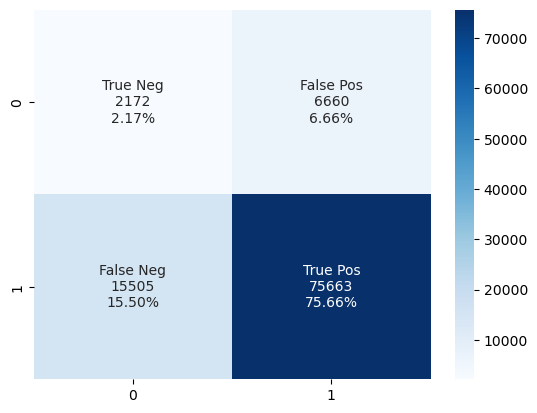

In [49]:
cf_KNN = confusion_matrix(target_test, target_pred_KNN)

print("Confusion Matrix of KNN")
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_KNN.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_KNN.flatten()/np.sum(cf_KNN)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_KNN, annot=labels, fmt='', cmap='Blues')